# WeatherPy
----

### Analysis
* As expected, the maximum temperature for May 31, 2019 did approach its highest point around the equator.  However, since it is currently late-spring, heading into summer in the Northern hemisphere, the actual peak temperatures fall closer to latitudes of 15-20, possibly due to the tilt of the earth's axis.  
* No locations were identified at a latitude below -60.  This is because the only landmass below -60 latitude is Antarctica, which has no cities.  
* There is no detectable relationship between latitude and percent humidity.  While some cities report humidities of slightly above 100%, which is technically possible due to super-saturation, one city is reporting almost 300% humidity.  This was confirmed to be a correct data-pull by identifying the city in the raw data and manually viewing the current weather information for that city on OpenWeatherMap, which showed 290% humidity for the town in question (Talara, Peru).  This was reported as an error to OWM.  This is possibly due to manual data entry or equipment error
* There is no detectable relationship between latitude and cloudiness, but it is obvious that the majority of the reporting is done based on 20% increments (0, 20%, 40%, 80%, 100%) based on the horizontal lines visible at those percentages.  This indicates that either the equipment used to detect cloudiness in most places reports in 20% increments or that humans are reporting this information and they tend towards those common increments.  

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "raw_data_by_cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
citynew = []
temp = []
humid = []
cloud = []
wind = []
date = []
latnew = []
lngnew = []
country = []
count = 0
setcount = 1
for city in cities:

    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        latnew.append(response['coord']["lat"])
        lngnew.append(response['coord']["lon"])
        country.append(response["sys"]["country"])
        count = count + 1
        citynew.append(city)
        print(f"Processing Record {count} of Set {setcount} | {city}")
    except:
        setcount = setcount + 1
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | mbandaka
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | riyadh
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | santa vitoria do palmar
Processing Record 9 of Set 1 | kieta
City not found. Skipping...
Processing Record 10 of Set 2 | constitucion
Processing Record 11 of Set 2 | atuona
Processing Record 12 of Set 2 | saskylakh
Processing Record 13 of Set 2 | saint-philippe
Processing Record 14 of Set 2 | kapaa
Processing Record 15 of Set 2 | punta arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 4 | vaini
Processing Record 17 of Set 4 | ponta do sol
Processing Record 18 of Set 4 | isla vista
Processing Record 19 of Set 4 | thompson
Processing Record 20 of Set 4 | iqaluit
Processing Record 21 of Set 4 | ilulissat
Processing Record 22 of Set 4 | listvyan

Processing Record 177 of Set 29 | shimoda
City not found. Skipping...
Processing Record 178 of Set 30 | dunedin
Processing Record 179 of Set 30 | qaqortoq
Processing Record 180 of Set 30 | dryden
Processing Record 181 of Set 30 | yulara
City not found. Skipping...
Processing Record 182 of Set 31 | tarko-sale
Processing Record 183 of Set 31 | surt
Processing Record 184 of Set 31 | puerto escondido
Processing Record 185 of Set 31 | sola
Processing Record 186 of Set 31 | spearfish
Processing Record 187 of Set 31 | yumen
Processing Record 188 of Set 31 | pitogo
Processing Record 189 of Set 31 | akureyri
Processing Record 190 of Set 31 | chimore
Processing Record 191 of Set 31 | palmer
Processing Record 192 of Set 31 | petawawa
Processing Record 193 of Set 31 | severo-kurilsk
City not found. Skipping...
Processing Record 194 of Set 32 | vardo
Processing Record 195 of Set 32 | camocim
Processing Record 196 of Set 32 | bontang
Processing Record 197 of Set 32 | dogondoutchi
City not found. Ski

Processing Record 353 of Set 52 | pemberton
City not found. Skipping...
Processing Record 354 of Set 53 | chipping sodbury
Processing Record 355 of Set 53 | kupang
Processing Record 356 of Set 53 | union
Processing Record 357 of Set 53 | bagepalli
City not found. Skipping...
Processing Record 358 of Set 54 | okhotsk
Processing Record 359 of Set 54 | takayama
Processing Record 360 of Set 54 | poum
Processing Record 361 of Set 54 | chiang rai
Processing Record 362 of Set 54 | alekseyevka
Processing Record 363 of Set 54 | zeya
Processing Record 364 of Set 54 | ahuimanu
Processing Record 365 of Set 54 | liuzhou
Processing Record 366 of Set 54 | northam
Processing Record 367 of Set 54 | waitati
Processing Record 368 of Set 54 | ballina
Processing Record 369 of Set 54 | pacific grove
Processing Record 370 of Set 54 | havre-saint-pierre
Processing Record 371 of Set 54 | plettenberg bay
Processing Record 372 of Set 54 | tilichiki
Processing Record 373 of Set 54 | montijo
Processing Record 374 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# print(len(wind))
# print(len(temp))
# print(len(humid))
# print(len(cloud))
# print(len(wind))
# print(len(citynew))
weather_df = pd.DataFrame({
    "City": citynew,
    "Country": country,
    "Date": date,
    "Latitude": latnew,
    "Longitude": lngnew,
    "Temperature" : temp,
    "Humidity" : humid,
    "Cloudiness" : cloud,
    "Wind Speed" : wind
})
export_csv = weather_df.to_csv (output_data_file, index = None, header=True) 

weather_df.head(10)


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,butaritari,KI,1559333271,3.07,172.79,83.75,75,100,13.04
1,kodiak,US,1559333271,39.95,-94.76,80.60,19,1,11.41
2,cidreira,BR,1559333271,-30.17,-50.22,62.51,81,100,12.19
3,mbandaka,CD,1559333271,0.05,18.26,71.87,95,81,1.12
4,ushuaia,AR,1559333040,-54.81,-68.31,33.80,86,90,24.16
5,riyadh,SA,1559333271,24.63,46.72,95.00,9,0,4.70
6,north bend,US,1559332545,43.41,-124.22,61.00,77,40,16.11
7,santa vitoria do palmar,BR,1559333272,-33.52,-53.37,57.11,73,31,6.46
8,kieta,PG,1559333272,-6.22,155.63,83.39,73,42,9.08
9,constitucion,MX,1559333080,23.99,-104.67,86.00,17,5,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

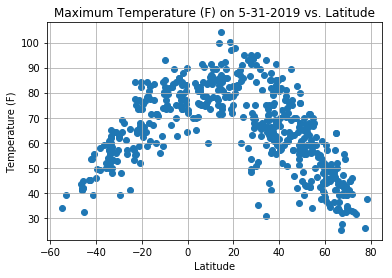

In [5]:
plt.scatter(latnew, temp)
plt.grid()
plt.title("Maximum Temperature (F) on 5-31-2019 vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Max_Temp_By_Lat.png")

#### Latitude vs. Humidity Plot

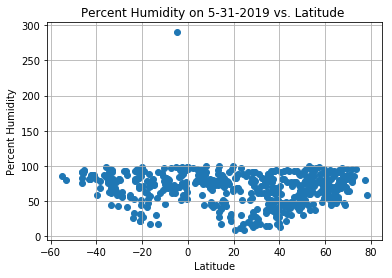

In [6]:
plt.scatter(latnew, humid)
plt.grid()
plt.title("Percent Humidity on 5-31-2019 vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.savefig("Humidity_By_Lat.png")

#### Latitude vs. Cloudiness Plot

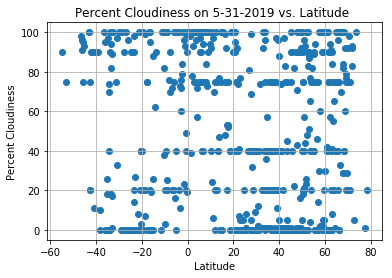

In [44]:
plt.scatter(latnew, cloud)
plt.grid()
plt.title("Percent Cloudiness on 5-31-2019 vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
plt.savefig("Cloudiness_By_Lat.png")

#### Latitude vs. Wind Speed Plot

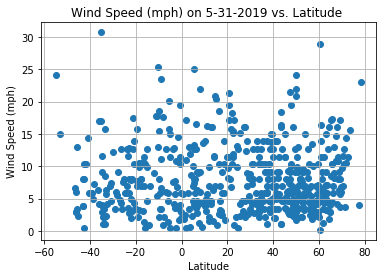

In [45]:
plt.scatter(latnew, wind)
plt.grid()
plt.title("Wind Speed (mph) on 5-31-2019 vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind_Speed_By_Lat.png")